In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
# !pip install scikit-learn

## Starting Linear Regression model
* House price prediction

In [5]:
%ls .

MultiVarReg.csv           reg.csv                   sal_reg.csv
lreg_pred.csv             reg_test.csv              salary_regression.ipynb
multiVarRegression.ipynb  regression.ipynb          singleVar_lineReg


In [6]:
df = pd.read_csv("reg.csv")

In [7]:
df.describe()

,area,price,year
count,5.000000,5.000000,5.000000
mean,3280.000000,626000.000000,2006.200000
std,540.370243,74949.983322,3.768289
min,2600.000000,550000.000000,2000.000000
25%,3000.000000,565000.000000,2006.000000
50%,3200.000000,610000.000000,2007.000000
75%,3600.000000,680000.000000,2008.000000
max,4000.000000,725000.000000,2010.000000


In [8]:
df.head(5)

,area,price,year
0,2600,550000,2000
1,3000,565000,2006
2,3200,610000,2007
3,3600,680000,2008
4,4000,725000,2010


In [9]:
%matplotlib inline

In [10]:
columns = df.columns.tolist()

In [11]:
print(columns)

['area', 'price', 'year']


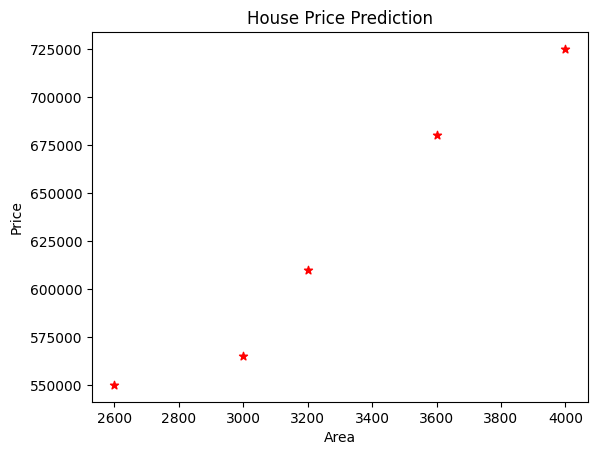

In [12]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("House Price Prediction")
plt.scatter(df.area, df.price, c="red", marker="*")

In [13]:
df.area.shape, df.price.shape

((5,), (5,))

In [14]:
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [15]:
df[['area','price']].shape

(5, 2)

In [16]:
reg  = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)


LinearRegression()

In [17]:
reg.coef_, reg.intercept_

(array([135.78767123]), 180616.43835616432)

In [18]:
reg.predict([[3300]])

/Users/pranayspeed/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [19]:
df1 = pd.read_csv('reg_test.csv')

In [20]:
df1.head(5)

,area
0,2334
1,3455
2,64363
3,2342
4,5334


In [21]:
prc = reg.predict(df1)

In [22]:
df1['prices'] = prc

In [23]:
df1

,area,prices
0,2334,4.975449e+05
1,3455,6.497628e+05
2,64363,8.920318e+06
3,2342,4.986312e+05
4,5334,9.049079e+05


In [24]:
df1.to_csv("lreg_pred.csv", index=False)

In [25]:
# out = a*x +b*y+c

## Multi-variate Linear Regression

In [26]:
df2 = pd.read_csv("reg.csv")

In [27]:
df2.head()

,area,price,year
0,2600,550000,2000
1,3000,565000,2006
2,3200,610000,2007
3,3600,680000,2008
4,4000,725000,2010


In [28]:
df2.columns

Index(['area', 'price', 'year'], dtype='object')

In [29]:
reg1 = linear_model.LinearRegression()
reg1.fit(df2[['area', 'year']], df2.price)

LinearRegression()

In [30]:
reg1.coef_, reg1.intercept_

(array([  195.01633987, -9199.34640523]), 18442075.163398676)

In [31]:
reg1.predict([[3500, 2007]])

/Users/pranayspeed/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([661544.11764706])

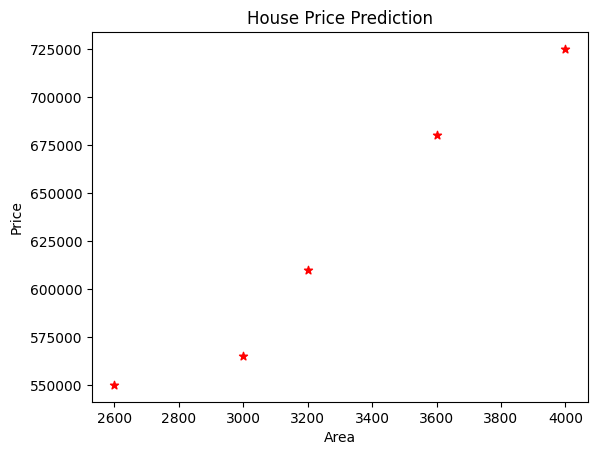

In [32]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("House Price Prediction")
plt.scatter(df.area, df.price, c="red", marker="*")


In [33]:
# z = mx+by +c

In [34]:
import pickle

In [36]:
with open('singleVar_lineReg_Model', 'wb') as f:
    pickle.dump(reg,f)

In [52]:
with open('singleVar_lineReg_Model', 'rb') as f:
    mp=pickle.load(f)

In [54]:
mp.predict([[5000]])

/Users/pranayspeed/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [55]:
import sklearn.externals as extjoblib
import joblib

In [56]:
joblib.dump(model,"lineReg_singleVar_model_Joblib")


['lineReg_singleVar_model_Joblib']

In [58]:
model.predict([[5000]])


/Users/pranayspeed/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [68]:
np.random.randn(5*7).reshape(-1,7)

array([[ 0.34726214,  1.22241683,  1.15835525,  0.50136574,  0.16405595,
         2.86672847, -0.857691  ],
       [ 1.16387514,  0.14744293,  1.79033239, -0.01180565,  0.19562959,
        -1.62791249,  0.79586363],
       [-1.09565211,  1.82722896,  0.17530649,  0.71843111, -0.1360872 ,
        -0.4159892 , -1.37673547],
       [-0.01709786,  1.19114488, -0.9193121 ,  0.28357174, -0.34778588,
        -0.5561841 , -0.44004586],
       [-0.51062864, -1.57643583,  1.68866811, -0.22974845,  2.37856181,
        -1.3770753 ,  1.33291205]])

In [75]:
pts = np.random.randn(3*100).reshape(-1,3)

In [76]:
np.save("pts.npy", pts)

In [77]:
np.savetxt("pts.txt", pts)

In [78]:
a = 23.4532634734537354737
b = 23.4532634734634523536

In [87]:
a==b, abs(a-b) < 1e-6

(False, True)

In [88]:
pts1 = np.load("pts.npy")

In [89]:
pts2 = np.loadtxt("pts.txt")

In [91]:
np.all(pts1==pts2)

True

In [96]:
t1 = [False]*100 +[True]


In [100]:
np.all(t1), np.any(t1)

(False, True)

In [101]:
t2 = [True]*100 + [False]

In [102]:
np.all(t2), np.any(t2)

(False, True)

In [103]:
np.all(abs(pts1-pts2)<1e-6)

True

In [106]:
if np.all(abs(pts1-pts2)<1e-6):
    print("Exact Match")
elif np.any(abs(pts1-pts2)<1e-6):
    print("Partial Match")
else:
    print("No Match")

Exact Match


In [108]:
pts1[:7].shape

(7, 3)

In [115]:
ar = [[5,7]]*10

In [118]:
len(ar), len(ar[0])

(10, 2)

In [119]:
nparr = np.array(ar)

In [120]:
nparr.shape

(10, 2)

In [124]:
ip = df2.to_numpy()

In [126]:
ip

array([[  2600, 550000,   2000],
       [  3000, 565000,   2006],
       [  3200, 610000,   2007],
       [  3600, 680000,   2008],
       [  4000, 725000,   2010]])

In [130]:
ip = ip[:, [0,2,1]]

In [136]:
ip[:,-1].reshape(-1,1).shape

(5, 1)

In [139]:
reg2 = linear_model.LinearRegression()
reg2.fit(ip[:,:-1], ip[:,-1])

LinearRegression()

In [143]:
reg2.predict(np.array([5000,2007, 6000,2006, 2000, 2010]).reshape(-1,2))

array([ 954068.62745098, 1158284.31372549,  341421.56862745])